# Token Parameters - Ratings

In [1]:
%load_ext autoreload
%autoreload 2
import sys
if "../src" not in sys.path:
    sys.path.append("../src")

In [2]:
import re
import pickle
import json
import random
from itertools import islice
from pathlib import Path
from dataclasses import dataclass
from typing import List, Tuple, Union, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import vec4gloss
from vec4gloss import check_hashes    
from vec4gloss import (
    AnnotFrameInfo, RatingFrameInfo, TokenParam
)
from vec4gloss import TokenStat, SequenceStat

## Data dependencies

```
30.42 => ..\data\rating_tokenparams_list.pkl 7f6db0
```

In [3]:
rating_info_path = "../data/rating_tokenparams_list.pkl"
_ = check_hashes([rating_info_path])

..\data\rating_tokenparams_list.pkl 7f6db0


## Load resources

In [4]:
rating_infos = pickle.loads(Path(rating_info_path).read_bytes())

In [5]:
len(rating_infos)

80

In [6]:
rating_infos[1]

({'cwnid': '07009803',
  'src': '這首回文詩<正>讀、反讀皆可。',
  'tgt': 'D。表特定對象的順序與預期的順序形成完全的對比。',
  'pos': 'D',
  'target': '正',
  'fillers': ['即將', '怎麼', '恐'],
  'example': '這首回文詩<正>讀、反讀皆可。',
  'from': 'vec4gloss',
  'definition': '表順著特定對象進行後述事件。',
  'item_id': 'D-06'},
 [<TokenParam 　表: F/A/D/R/X 1.00/1.00/1.00/1.00/0.00>,
  <TokenParam 特定: F/A/D/R/X 0.05/0.03/0.04/0.00/0.00>,
  <TokenParam 　對: F/A/D/R/X 0.48/0.61/0.43/0.00/0.00>,
  <TokenParam 　象: F/A/D/R/X 1.00/1.00/0.00/1.00/0.00>,
  <TokenParam 　的: F/A/D/R/X 0.30/0.32/0.01/0.01/0.00>,
  <TokenParam 　順: F/A/D/R/X 0.95/0.96/0.03/0.01/0.00>,
  <TokenParam 　序: F/A/D/R/X 1.00/1.00/0.08/1.00/0.00>,
  <TokenParam 　與: F/A/D/R/X 0.82/0.31/0.01/0.85/0.00>,
  <TokenParam 　預: F/A/D/R/X 0.94/0.67/0.01/1.00/0.00>,
  <TokenParam 　期: F/A/D/R/X 1.00/1.00/0.04/1.00/0.00>,
  <TokenParam 　的: F/A/D/R/X 0.80/0.16/0.01/0.19/0.00>,
  <TokenParam 　順: F/A/D/R/X 1.00/0.97/0.04/0.43/0.00>,
  <TokenParam 　序: F/A/D/R/X 1.00/1.00/0.06/1.00/0.00>,
  <TokenParam 形成: F/A/D

In [7]:
entry_x = rating_infos[0]
params = entry_x[1]
SequenceStat(params)

<SequenceStat Full/Masked/Replaced: 0.40/4.06/1.41>

In [8]:
rating_seq_data = []
for rating_x, params_x in tqdm(rating_infos):    
    seq_stat = SequenceStat(params_x)
    entry_x = {
        "cwnid": rating_x["cwnid"],
        "pos": rating_x["pos"],
        "target": rating_x["target"],
        "full_nll": seq_stat.full_nll(),
        "masked_nll": seq_stat.masked_nll(),
        "replaced_nll": seq_stat.replaced_nll(),
        "semanticness": seq_stat.replaced_nll() - seq_stat.full_nll(),
        "contextualness": seq_stat.masked_nll() - seq_stat.full_nll(),
        # "random_pp": seq_stat.random_pp()
    }
    rating_seq_data.append(entry_x)    

  0%|          | 0/80 [00:00<?, ?it/s]

In [9]:
cols = "cwnid,pos,target,full_nll,masked_nll,replaced_nll,semanticness,contextualness"
rating_seq_df = pd.DataFrame.from_records(rating_seq_data, columns=cols.split(","))
rating_seq_df = rating_seq_df.sort_values("pos", key=lambda x: x.apply(lambda p: "NVDO".index(p)))
rating_seq_df.drop(["cwnid", "target"], axis=1).groupby("pos").median().reindex(list("NVDO"))

,full_nll,masked_nll,replaced_nll,semanticness,contextualness
pos,,,,,
N,0.593909,3.292894,3.997100,3.104136,2.825332
V,0.490258,3.728331,3.213390,2.614008,2.998685
D,0.328676,3.576951,2.220796,1.931385,2.806129
O,0.344315,3.247282,2.730803,1.978800,2.612857


(-1.0, 10.0)

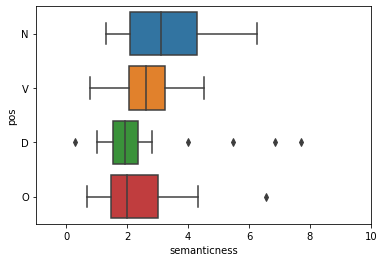

In [10]:
import seaborn as sns
ax = sns.boxplot(x="semanticness", y='pos', 
                 data=rating_seq_df)
ax.set_xlim((-1,10))

(-1.0, 10.0)

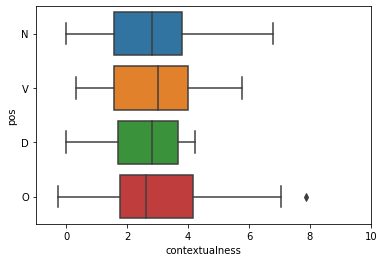

In [11]:
import seaborn as sns
ax = sns.boxplot(x="contextualness", y='pos', 
                 data=(rating_seq_df
                       .sort_values("pos", 
                                    key=lambda x: x.apply(lambda p: "NVDO".index(p)))))
ax.set_xlim((-1,10))

In [12]:
out_path = "../data/token-params-ratings.csv"
rating_seq_df.to_csv(out_path, index=False)

## Output Hashes

```
..\data\token-params-ratings.csv 9fca28
```

In [13]:
_ = check_hashes([out_path])

..\data\token-params-ratings.csv 9fca28
